# Step 1: Load and Inspect Data

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv(r"C:\Users\Anthony Bannerman\Documents\Codveda-Internship-Data-Science\Task_3_Classification_Iris\1) iris.csv")

In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Step 2: Preprocess Data
Encode the target column (species) to numerical labels.

Split into features X and target y.

Optional: scale features for Logistic Regression or SVM.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [23]:
# Encode target
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])  # setosa=0, versicolor=1, virginica=2


In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
# Features and target
X = df.drop('species', axis=1)
y = df['species']

In [27]:
# Split data (train/test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
# Feature scaling for Logistic Regression/SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [30]:
# Train Logistic Regression
lr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

Logistic Regression Accuracy: 0.83
Precision: 0.85, Recall: 0.83


C:\Users\Anthony Bannerman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Anthony Bannerman\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


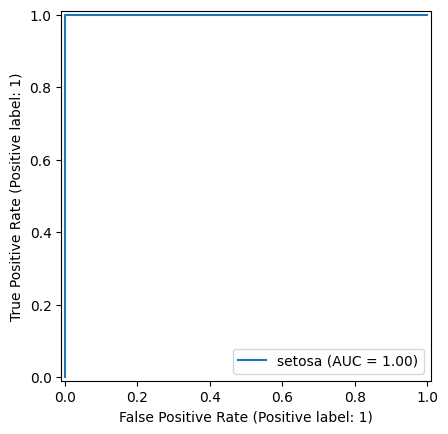

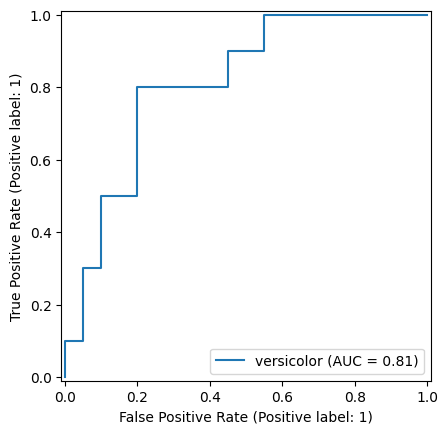

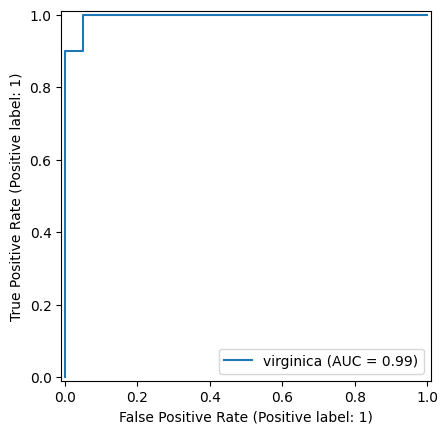

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = lr.decision_function(X_test_scaled)

# Plot ROC for each class
for i in range(3):
    RocCurveDisplay.from_predictions(y_test_bin[:, i], y_score[:, i], name=le.classes_[i])
plt.show()


# Step 4: Decision Tree Classifier

Decision Tree Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



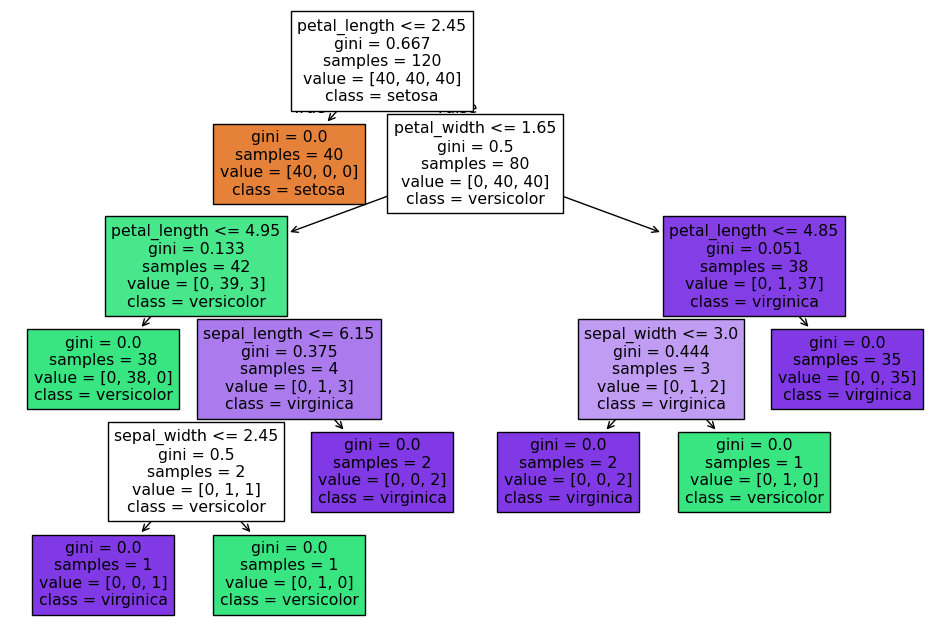

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Decision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Optional: Visualize tree
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.show()


# Step 5: Compare Logistic Regression with Other Classifiers
You can train Random Forest or SVM similarly:

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# SVM
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test_scaled)))


Random Forest Accuracy: 0.9
SVM Accuracy: 0.9666666666666667
